# Rice_Prediction_CNN_PReLU layer

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.layers import PReLU
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders

## Split_Folder

In [3]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Rice_Image_Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img'

In [4]:
#splitfolders.fixed(input=input_dir,output=output_dir,fixed=(500,100,100),seed=1337)

## Data Preparation

In [5]:
dataGen=ImageDataGenerator(rescale=1/255)

In [6]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\val'

In [7]:
train_itt=dataGen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100,100))
test_itt=dataGen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100,100))
val_itt=dataGen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100,100))

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Model

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(32,(3,3),activation=PReLU(),input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation=PReLU()))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation=PReLU()))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation=PReLU()))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [11]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
40/40 [==============================] - 62s 2s/step - loss: 0.5471 - accuracy: 0.8024 - val_loss: 0.1835 - val_accuracy: 0.9260
Epoch 2/50
40/40 [==============================] - 54s 1s/step - loss: 0.1606 - accuracy: 0.9484 - val_loss: 0.1377 - val_accuracy: 0.9480
Epoch 3/50
40/40 [==============================] - 55s 1s/step - loss: 0.1278 - accuracy: 0.9508 - val_loss: 0.1460 - val_accuracy: 0.9360
Epoch 4/50
40/40 [==============================] - 55s 1s/step - loss: 0.0910 - accuracy: 0.9724 - val_loss: 0.1164 - val_accuracy: 0.9660
Epoch 5/50
40/40 [==============================] - 55s 1s/step - loss: 0.0772 - accuracy: 0.9792 - val_loss: 0.0980 - val_accuracy: 0.9640
Epoch 6/50
40/40 [==============================] - 56s 1s/step - loss: 0.0785 - accuracy: 0.9732 - val_loss: 0.1274 - val_accuracy: 0.9640
Epoch 7/50
40/40 [==============================] - 55s 1s/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0940 - val_accuracy: 0.9640
Epoch 8/50
40/40 [==

<AxesSubplot:>

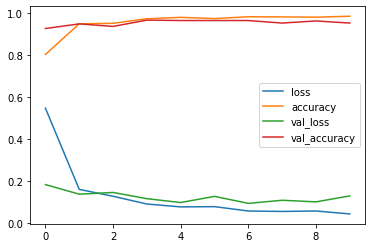

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

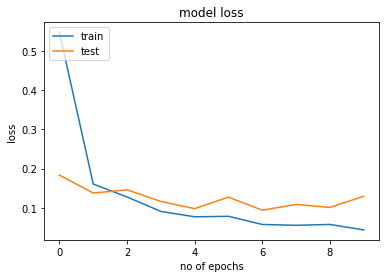

In [13]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

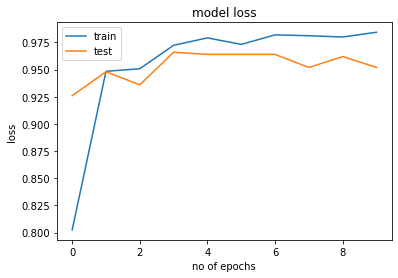

In [14]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
#model.save('weather_classification_model.h5')

In [16]:
class_label= test_itt.class_indices
class_label

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}